## FI6161 Block 2
1) Identify 3 stocks
2) Provide analysis using Python + Text
3) Perform Linear Regression and dicuss terms

https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

***

Imports

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # pip install yfinance if necessary
from yahoofinancials import YahooFinancials
import pandas_ta as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

I am going to choose META, AMD, and the S&P 500 (^GSPC).

In [403]:
tickers = ['META', 'AMD', '^GSPC'] # Establishing the tickers we are going to use
stocks_df = yf.download( # downloading from yahoofinance module
    tickers, # loading the tickers
    start='2024-02-11', # start date from example above
    end = '2024-10-25', # end date from example above
    interval = '1d', # 1d intervals
    progress=False) # don't need to display progress bar, but if you want to for large data sets you can

In [404]:
stocks_df.head(10)

Price                       Adj Close                                Close  \
Ticker                            AMD        META        ^GSPC         AMD   
Date                                                                         
2024-02-12 00:00:00+00:00  171.910004  467.492432  5021.839844  171.910004   
2024-02-13 00:00:00+00:00  171.539993  458.738770  4953.169922  171.539993   
2024-02-14 00:00:00+00:00  178.699997  471.859283  5000.620117  178.699997   
2024-02-15 00:00:00+00:00  176.759995  482.577026  5029.729980  176.759995   
2024-02-16 00:00:00+00:00  173.869995  471.899170  5005.569824  173.869995   
2024-02-20 00:00:00+00:00  165.690002  470.333893  4975.509766  165.690002   
2024-02-21 00:00:00+00:00  164.289993  467.120148  4981.799805  164.289993   
2024-02-22 00:00:00+00:00  181.860001  485.184967  5087.029785  181.860001   
2024-02-23 00:00:00+00:00  176.520004  483.089050  5088.799805  176.520004   
2024-02-26 00:00:00+00:00  176.009995  480.803467  5069.529785  176.009995   

Price                                                     High              \
Ticker                           META        ^GSPC         AMD        META   
Date                                                                         
2024-02-12 00:00:00+00:00  468.899994  5021.839844  177.410004  479.149994   
2024-02-13 00:00:00+00:00  460.119995  4953.169922  173.169998  467.890015   
2024-02-14 00:00:00+00:00  473.279999  5000.620117  178.740005  474.109985   
2024-02-15 00:00:00+00:00  484.029999  5029.729980  180.500000  488.619995   
2024-02-16 00:00:00+00:00  473.320007  5005.569824  180.330002  478.959991   
2024-02-20 00:00:00+00:00  471.750000  4975.509766  171.809998  476.179993   
2024-02-21 00:00:00+00:00  468.029999  4981.799805  164.899994  469.000000   
2024-02-22 00:00:00+00:00  486.130005  5087.029785  183.830002  489.989990   
2024-02-23 00:00:00+00:00  484.029999  5088.799805  183.800003  494.359985   
2024-02-26 00:00:00+00:00  481.739990  5069.529785  179.839996  486.140015   

Price                                          Low                           \
Ticker                           ^GSPC         AMD        META        ^GSPC   
Date                                                                          
2024-02-12 00:00:00+00:00  5048.390137  170.669998  466.579987  5016.830078   
2024-02-13 00:00:00+00:00  4971.299805  164.300003  455.089996  4920.310059   
2024-02-14 00:00:00+00:00  5002.520020  172.880005  466.089996  4956.450195   
2024-02-15 00:00:00+00:00  5032.720215  175.259995  472.220001  4999.439941   
2024-02-16 00:00:00+00:00  5038.700195  173.250000  469.209991  4999.520020   
2024-02-20 00:00:00+00:00  4993.709961  162.000000  466.559998  4955.020020   
2024-02-21 00:00:00+00:00  4983.209961  161.809998  461.790009  4946.000000   
2024-02-22 00:00:00+00:00  5094.390137  172.000000  476.059998  5038.830078   
2024-02-23 00:00:00+00:00  5111.060059  174.550003  482.350006  5081.459961   
2024-02-26 00:00:00+00:00  5097.660156  174.809998  480.600006  5068.910156   

Price                            Open                              Volume  \
Ticker                            AMD        META        ^GSPC        AMD   
Date                                                                        
2024-02-12 00:00:00+00:00  172.679993  468.190002  5026.830078   58177100   
2024-02-13 00:00:00+00:00  167.940002  456.869995  4967.939941   63071300   
2024-02-14 00:00:00+00:00  173.470001  467.929993  4976.439941   57402500   
2024-02-15 00:00:00+00:00  179.139999  475.279999  5003.140137   51126400   
2024-02-16 00:00:00+00:00  177.449997  478.109985  5031.129883   53896000   
2024-02-20 00:00:00+00:00  171.139999  469.720001  4989.319824   66550000   
2024-02-21 00:00:00+00:00  162.740005  466.500000  4963.029785   48774600   
2024-02-22 00:00:00+00:00  173.199997  480.239990  5038.830078  100684700   
2024-02-23 00:00:00+00:00  181.860001  488.049988  5100.919922   69207400   
2024-02-26 00:00:0

In [405]:
stocks_df.describe() # View data with extra info courtesy of pandas library

Price    Adj Close                                Close              \
Ticker         AMD        META        ^GSPC         AMD        META   
count   178.000000  178.000000   178.000000  178.000000  178.000000   
mean    162.334101  506.026229  5384.429375  162.334101  506.669438   
std      16.402132   36.825206   246.659802   16.402132   36.550620   
min     128.669998  429.333771  4953.169922  128.669998  430.170013   
25%     152.280003  480.651291  5182.137695  152.280003  481.587509   
50%     160.220001  500.308838  5357.409912  160.220001  500.985001   
75%     171.007504  523.625732  5587.337524  171.007504  524.254990   
max     211.380005  595.940002  5864.669922  211.380005  595.940002   

Price                      High                                  Low  \
Ticker        ^GSPC         AMD        META        ^GSPC         AMD   
count    178.000000  178.000000  178.000000   178.000000  178.000000   
mean    5384.429375  165.658034  512.853595  5408.017087  159.293596   
std      246.659802   16.686813   36.614255   246.026641   16.006142   
min     4953.169922  135.500000  439.619995  4971.299805  121.830002   
25%     5182.137695  155.152500  486.849991  5194.020142  150.612499   
50%     5357.409912  163.770004  507.699997  5375.515137  158.129997   
75%     5587.337524  173.492504  530.525009  5621.995117  166.752506   
max     5864.669922  227.300003  602.950012  5878.459961  208.220001   

Price                                  Open                           \
Ticker        META        ^GSPC         AMD        META        ^GSPC   
count   178.000000   178.000000  178.000000  178.000000   178.000000   
mean    500.200393  5357.958880  162.782135  506.637751  5384.721724   
std      37.020900   245.606048   16.284864   37.402944   246.526504   
min     414.500000  4920.310059  122.160004  421.399994  4963.029785   
25%     475.057495  5145.617676  153.107506  479.042503  5171.869873   
50%     495.190002  5331.425049  160.680000  502.324997  5355.399902   
75%     515.587494  5562.119873  171.015003  521.747498  5599.682617   
max     589.960022  5846.109863  213.410004  598.219971  5875.620117   

Price         Volume                              
Ticker           AMD          META         ^GSPC  
count   1.780000e+02  1.780000e+02  1.780000e+02  
mean    5.216346e+07  1.419022e+07  3.858989e+09  
std     1.985266e+07  7.586482e+06  7.154915e+08  
min     2.172850e+07  6.005600e+06  2.179470e+09  
25%     3.775082e+07  1.019268e+07  3.491622e+09  
50%     4.824150e+07  1.209495e+07  3.739385e+09  
75%     6.326848e+07  1.581840e+07  4.023635e+09  
max     1.205926e+08  8.289070e+07  7.867260e+09

We are going to run a brief experiment by plotting this data without normalizing it, then comparing it to the graph after normalization. Normaliziation is helpful for analysing trends across data sets.

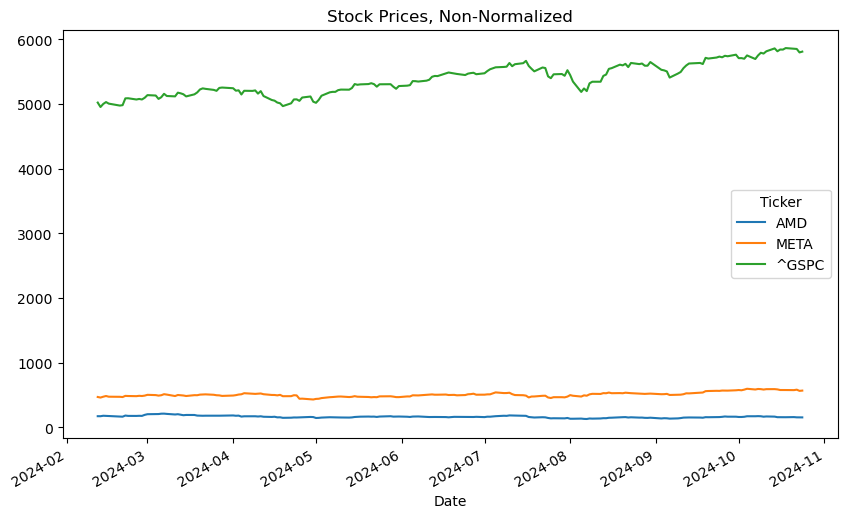

In [407]:
stocks_df['Close'].plot(title="Stock Prices, Non-Normalized", figsize=(10, 6)) # plotting close values of the stock of the pre-normalized data
plt.savefig("Initial Data.png", dpi=300, bbox_inches='tight')

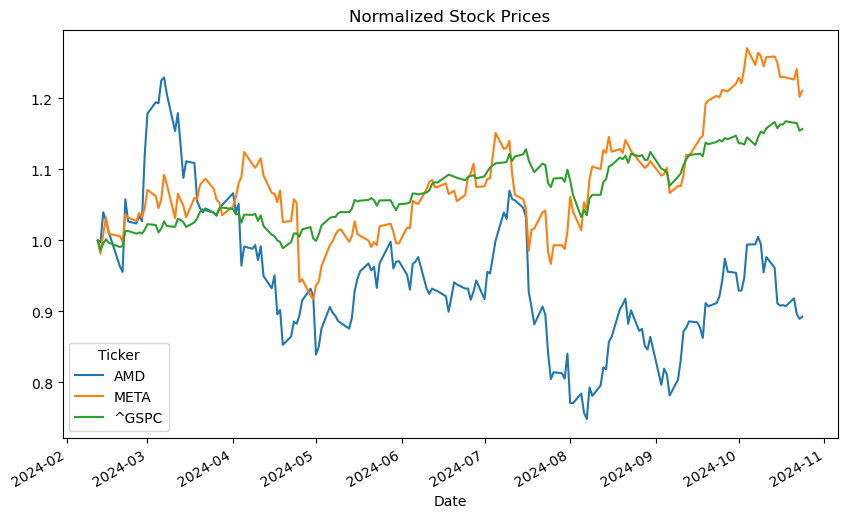

In [408]:
# Now to normalize the data

def normalize(df):
    return df/df.iloc[0,:]

normalized = normalize(stocks_df)
normalized['Close'].plot(title='Normalized Stock Prices', figsize=(10, 6))
plt.savefig("Normalized Data.png", dpi=300, bbox_inches='tight')

So, to better identify trends and to help analyze patterns between data sets, it is clear that using the normalized data set is better. While this is not the "true" value of the stocks, the trends are now more easily comparable across the 3 data sets. 

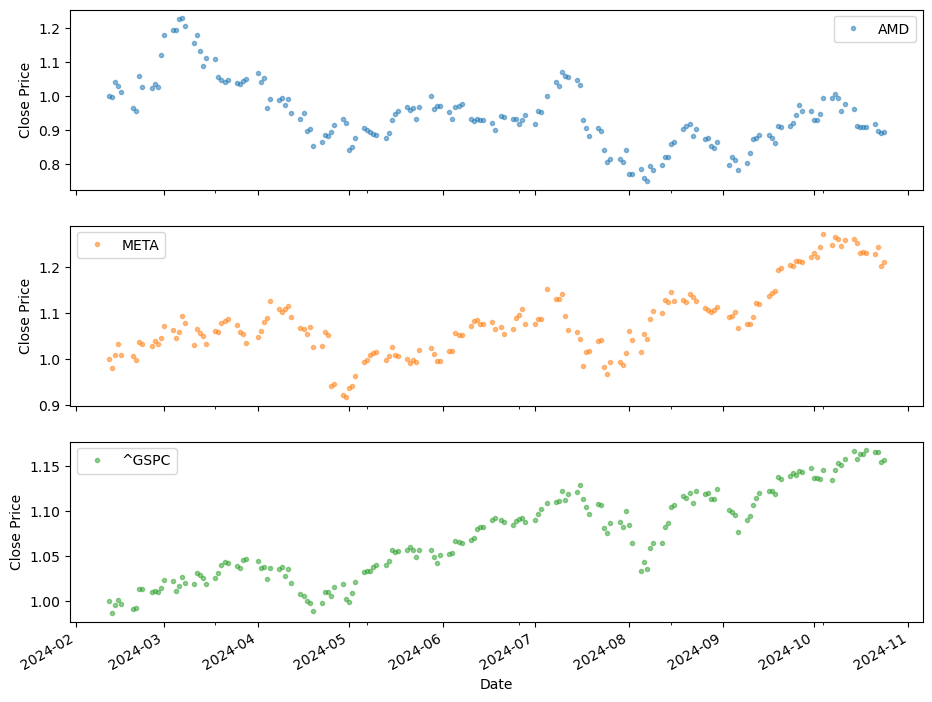

In [410]:
# Plotting the 3 data sets independently.

axes = normalized['Close'].plot(marker='.', alpha = 0.5, linestyle = 'none', figsize = (11, 9), subplots=True)
for x in axes:
    x.set_ylabel('Close Price')

In [411]:
close_stocksdf = stocks_df['Close']
close_stocksdf

Ticker,AMD,META,^GSPC
Date,,,
2024-02-12 00:00:00+00:00,171.910004,468.899994,5021.839844
2024-02-13 00:00:00+00:00,171.539993,460.119995,4953.169922
2024-02-14 00:00:00+00:00,178.699997,473.279999,5000.620117
2024-02-15 00:00:00+00:00,176.759995,484.029999,5029.729980
2024-02-16 00:00:00+00:00,173.869995,473.320007,5005.569824
...,...,...,...
2024-10-18 00:00:00+00:00,155.970001,576.469971,5864.669922
2024-10-21 00:00:00+00:00,157.899994,575.159973,5853.979980
2024-10-22 00:00:00+00:00,154.089996,582.010010,5851.200195


In [412]:
close_stocksdf.describe()

Ticker,AMD,META,^GSPC
count,178.000000,178.000000,178.000000
mean,162.334101,506.669438,5384.429375
std,16.402132,36.550620,246.659802
min,128.669998,430.170013,4953.169922
25%,152.280003,481.587509,5182.137695
50%,160.220001,500.985001,5357.409912
75%,171.007504,524.254990,5587.337524
max,211.380005,595.940002,5864.669922


In [413]:
# Starting the analysis of our chosen stock, the S&P 500.

stocks_df = yf.download('^GSPC',
                      start='2021-01-01', 
                      end='2021-11-02', 
                      progress=False)

In [414]:
stocks_df.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2021-01-04 00:00:00+00:00,3700.649902,3700.649902,3769.989990,3662.709961,3764.610107,5015000000
2021-01-05 00:00:00+00:00,3726.860107,3726.860107,3737.830078,3695.070068,3698.020020,4591020000
2021-01-06 00:00:00+00:00,3748.139893,3748.139893,3783.040039,3705.340088,3712.199951,6064110000
2021-01-07 00:00:00+00:00,3803.790039,3803.790039,3811.550049,3764.709961,3764.709961,5099160000
2021-01-08 00:00:00+00:00,3824.679932,3824.679932,3826.689941,3783.600098,3815.050049,4773040000
2021-01-11 00:00:00+00:00,3799.610107,3799.610107,3817.860107,3789.020020,3803.139893,4465430000
2021-01-12 00:00:00+00:00,3801.189941,3801.189941,3810.780029,3776.510010,3801.620117,4994950000
2021-01-13 00:00:00+00:00,3809.840088,3809.840088,3820.959961,3791.500000,3802.229980,4602510000


In [415]:
print(stocks_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2021-01-04 00:00:00+00:00 to 2021-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, ^GSPC)  210 non-null    float64
 1   (Close, ^GSPC)      210 non-null    float64
 2   (High, ^GSPC)       210 non-null    float64
 3   (Low, ^GSPC)        210 non-null    float64
 4   (Open, ^GSPC)       210 non-null    float64
 5   (Volume, ^GSPC)     210 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.5 KB
None


In [416]:
close_df = stocks_df[['Close']]

In [417]:
close_df.head(10)

Price,Close
Ticker,^GSPC
Date,
2021-01-04 00:00:00+00:00,3700.649902
2021-01-05 00:00:00+00:00,3726.860107
2021-01-06 00:00:00+00:00,3748.139893
2021-01-07 00:00:00+00:00,3803.790039
2021-01-08 00:00:00+00:00,3824.679932
2021-01-11 00:00:00+00:00,3799.610107
2021-01-12 00:00:00+00:00,3801.189941
2021-01-13 00:00:00+00:00,3809.840088


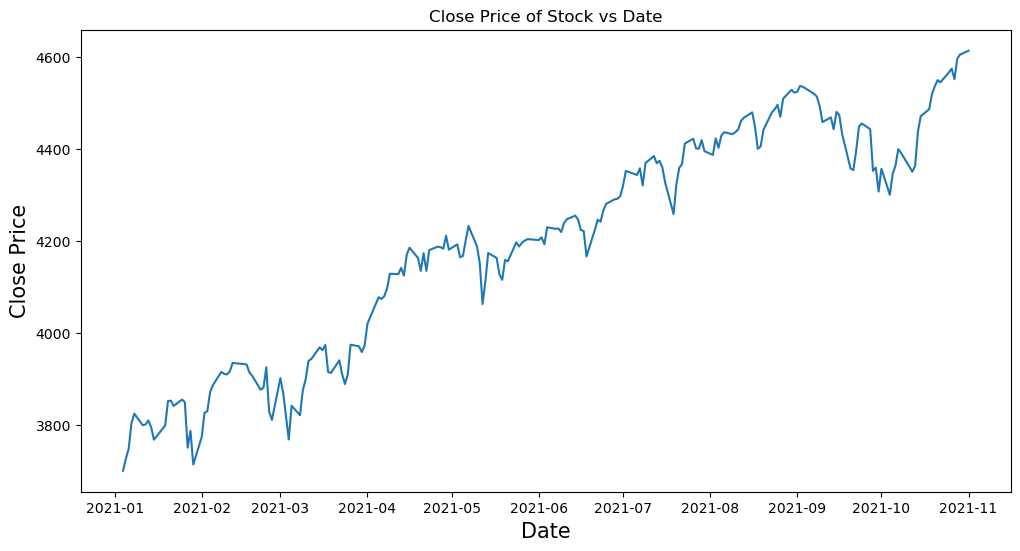

In [418]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.title('Close Price of Stock vs Date')
plt.savefig('ClosePrice.png', dpi=300, bbox_inches='tight')
plt.show()

In [419]:
close_df.ta.ema(close='Close', length=10) # Doing EMA using method #1

Price,Close
Ticker,^GSPC
Date,
2021-01-04 00:00:00+00:00,3700.649902
2021-01-05 00:00:00+00:00,3726.860107
2021-01-06 00:00:00+00:00,3748.139893
2021-01-07 00:00:00+00:00,3803.790039
2021-01-08 00:00:00+00:00,3824.679932
...,...
2021-10-26 00:00:00+00:00,4574.790039
2021-10-27 00:00:00+00:00,4551.680176


In [462]:
ema_10 = close_df[('Close', '^GSPC')].ewm(span=10, adjust=False).mean()
close_df.loc[:, ('EMA_10', '^GSPC')] = ema_10
close_df.head()

Price,Close,EMA_10
Ticker,^GSPC,^GSPC
Date,,
2021-01-04 00:00:00+00:00,3700.649902,3700.649902
2021-01-05 00:00:00+00:00,3726.860107,3705.415394
2021-01-06 00:00:00+00:00,3748.139893,3713.183485
2021-01-07 00:00:00+00:00,3803.790039,3729.657404
2021-01-08 00:00:00+00:00,3824.679932,3746.934227


In [464]:
close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2021-01-04 00:00:00+00:00 to 2021-11-01 00:00:00+00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   210 non-null    float64
 1   (EMA_10, ^GSPC)  210 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


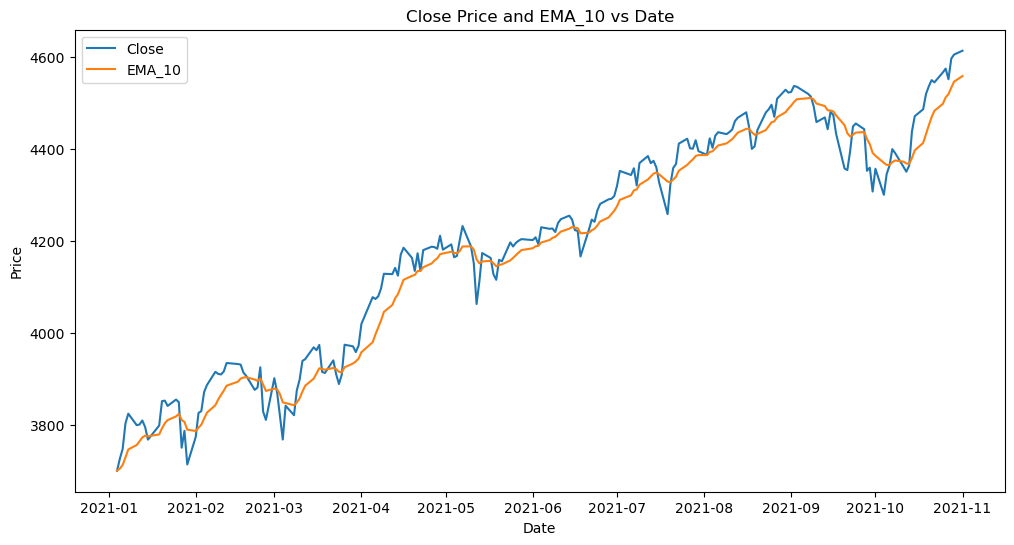

In [466]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Close Price and EMA_10 vs Date") 
plt.savefig('Close_and_EMA.png', dpi=300, bbox_inches='tight')
plt.legend(['Close','EMA_10'])

In [468]:
print(close_df.columns)
print(close_df.head)
y_train, y_test, x_train, x_test = train_test_split(close_df[['Close']], close_df[['EMA_10']], test_size=.2)

MultiIndex([( 'Close', '^GSPC'),
            ('EMA_10', '^GSPC')],
           names=['Price', 'Ticker'])
<bound method NDFrame.head of Price                            Close       EMA_10
Ticker                           ^GSPC        ^GSPC
Date                                               
2021-01-04 00:00:00+00:00  3700.649902  3700.649902
2021-01-05 00:00:00+00:00  3726.860107  3705.415394
2021-01-06 00:00:00+00:00  3748.139893  3713.183485
2021-01-07 00:00:00+00:00  3803.790039  3729.657404
2021-01-08 00:00:00+00:00  3824.679932  3746.934227
...                                ...          ...
2021-10-26 00:00:00+00:00  4574.790039  4512.158372
2021-10-27 00:00:00+00:00  4551.680176  4519.344155
2021-10-28 00:00:00+00:00  4596.419922  4533.357930
2021-10-29 00:00:00+00:00  4605.379883  4546.452831
2021-11-01 00:00:00+00:00  4613.669922  4558.674120

[210 rows x 2 columns]>


In [470]:
x_train

Price,EMA_10
Ticker,^GSPC
Date,
2021-04-01 00:00:00+00:00,3958.242967
2021-05-21 00:00:00+00:00,4149.146658
2021-04-15 00:00:00+00:00,4100.124979
2021-06-25 00:00:00+00:00,4242.420659
2021-07-21 00:00:00+00:00,4333.656101
...,...
2021-03-01 00:00:00+00:00,3879.127297
2021-09-15 00:00:00+00:00,4483.571714


In [472]:
x_test

Price,EMA_10
Ticker,^GSPC
Date,
2021-01-14 00:00:00+00:00,3776.978811
2021-02-17 00:00:00+00:00,3900.879788
2021-08-26 00:00:00+00:00,4460.168479
2021-07-20 00:00:00+00:00,4328.093025
2021-01-28 00:00:00+00:00,3806.688671
2021-05-11 00:00:00+00:00,4181.684143
2021-06-08 00:00:00+00:00,4206.722076
2021-10-26 00:00:00+00:00,4512.158372


In [486]:
linearReg = LinearRegression()

In [488]:
linearReg.fit(x_train, y_train)

LinearRegression()

In [490]:
y_pred = linearReg.predict(x_test)

In [492]:
print("Model Coefficients:", linearReg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99091881]]
Mean Absolute Error: 30.97431988549519
R2 Score: 0.9779859417255325


In [482]:
x_test['EMA_10'].values

array([[3776.97881094],
       [3900.87978798],
       [4460.16847941],
       [4328.09302518],
       [3806.68867095],
       [4181.68414282],
       [4206.7220761 ],
       [4512.15837215],
       [4027.60624693],
       [3713.18348479],
       [3705.41539418],
       [4507.77327996],
       [3901.12098922],
       [4451.46101089],
       [4060.91146811],
       [3997.08047501],
       [4339.80589715],
       [4432.84084175],
       [4151.18231575],
       [4367.694185  ],
       [4385.33758944],
       [3764.63498373],
       [3888.06991625],
       [4340.19615935],
       [4416.64605792],
       [3746.934227  ],
       [3803.75151811],
       [3842.98589638],
       [4145.1069935 ],
       [4391.62593396],
       [4469.11423173],
       [4162.2867381 ],
       [3818.74590746],
       [3877.520523  ],
       [4333.74864789],
       [4124.30001657],
       [3921.8784279 ],
       [4115.64229456],
       [4368.55960285],
       [3843.03456663],
       [4265.64599527],
       [4413.299

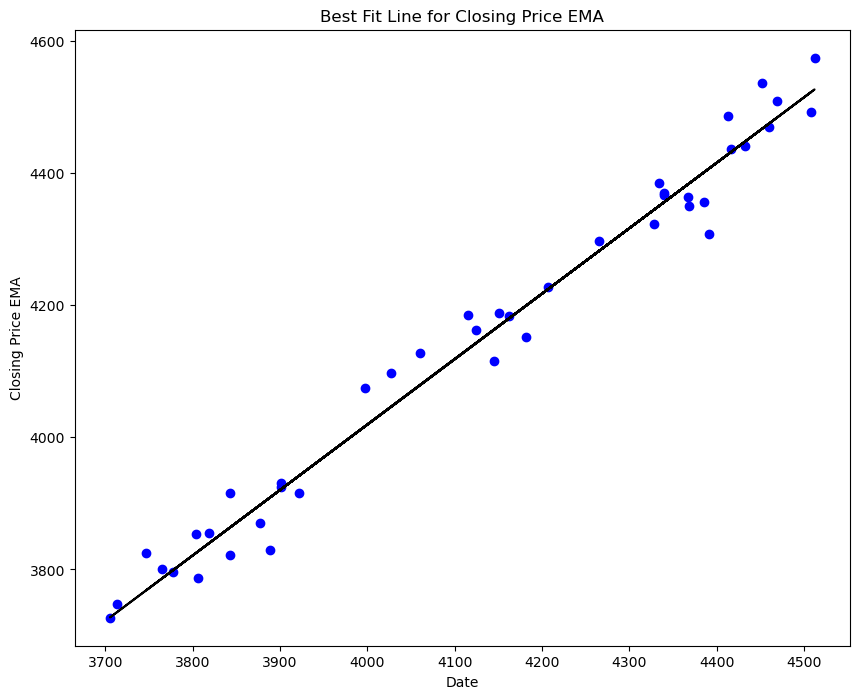

In [496]:
plt.figure(figsize = (10,8))
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test.values,y_pred, color='black')
plt.title('Best Fit Line for Closing Price EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price EMA')
plt.savefig('LinReg.png', dpi=300, bbox_inches='tight')